## Demand - Driven Supply Optimization for Noodles -- Leveraging Data Analytics to Enhance Inventory Management and Profitability for FMCG Company

# ------------------------------------------------------------------------
#### Author – Chandan D. Chaudhari
#### Email id – chaudhari.chandan22@gmail.com
#### GitHub Link - https://github.com/chandanc5525
#### Project Link - https://github.com/chandanc5525/SupplyChain_BusinessModel
# ------------------------------------------------------------------------

### Business Scenario: 
A Fast Moving Consumer Goods (FMCG) company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is low and vice-versa which as a result as a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each warehouse in entire country.

### Goal & Objective: 
The objective of this exercise is to build a model, using historical data that will determine demand pattern and optimum weight of the product to ship each time from the respective warehouse.
# -------------------------------------------------------------------------

#### STEP -1 : DATA ANALYTICS 
# ------------------------------------------------------------------------

In [1]:
# Importing Python Libraries
import numpy as np 
import pandas as pd 

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt 

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset using Pandas Library

df = pd.read_csv('https://raw.githubusercontent.com/chandanc5525/SupplyChain_BusinessModel/main/Dataset/SCM.csv')

df.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,...,0,78,43.0,NaN,6,0,C,6,2,7130


In [3]:
# Checking dataset shape
df.shape

(22150, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [5]:
categorical_info  = df[['Location_type','zone','WH_regional_zone','wh_owner_type','WH_capacity_size','approved_wh_govt_certificate']]

for i in categorical_info:
    print('*'*20)
    print(i)
    print(categorical_info[i].value_counts())

********************
Location_type
Rural    20334
Urban     1816
Name: Location_type, dtype: int64
********************
zone
North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64
********************
WH_regional_zone
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64
********************
wh_owner_type
Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64
********************
WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: WH_capacity_size, dtype: int64
********************
approved_wh_govt_certificate
C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64


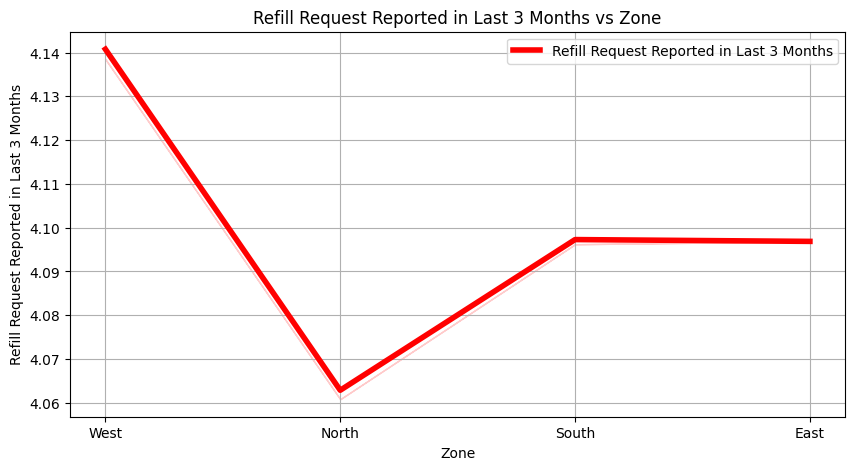

In [52]:
# Number of Refill Request Reported in Last 3 Months vs Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['num_refill_req_l3m'],label = 'Refill Request Reported in Last 3 Months',color='red',linewidth=4,ci = 0.014)
plt.title('Refill Request Reported in Last 3 Months vs Zone')
plt.xlabel('Zone')
plt.ylabel('Refill Request Reported in Last 3 Months')
plt.grid()
plt.show()

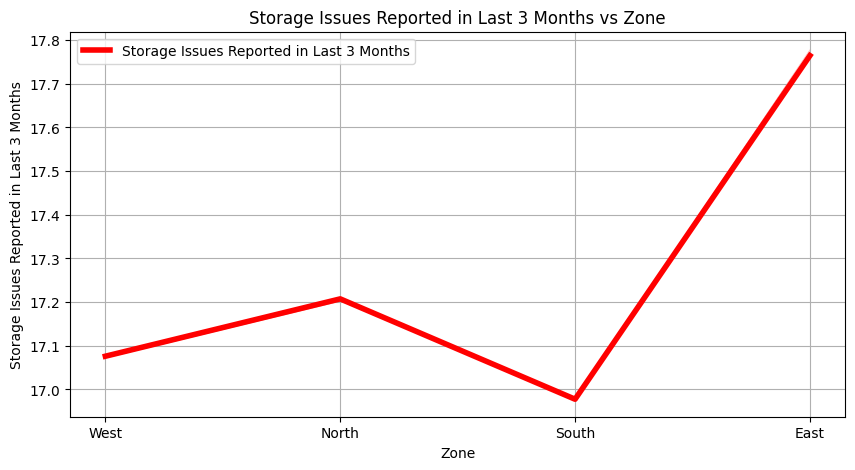

In [53]:
# Storage Issues Reported in Last 3 Months vs Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['storage_issue_reported_l3m'],label = 'Storage Issues Reported in Last 3 Months',color='red',linewidth=4,ci = 0.014)
plt.title('Storage Issues Reported in Last 3 Months vs Zone')
plt.xlabel('Zone')
plt.ylabel('Storage Issues Reported in Last 3 Months')
plt.grid()
plt.show()

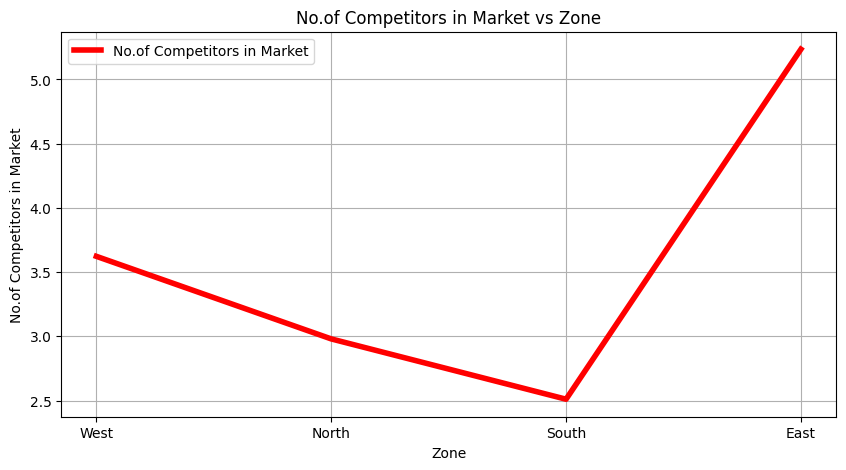

In [54]:
# Number of Competitors w.r.t Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['Competitor_in_mkt'],label = 'No.of Competitors in Market',color='red',linewidth=4,ci = 0.014)
plt.title('No.of Competitors in Market vs Zone')
plt.xlabel('Zone')
plt.ylabel('No.of Competitors in Market')
plt.grid()
plt.show()

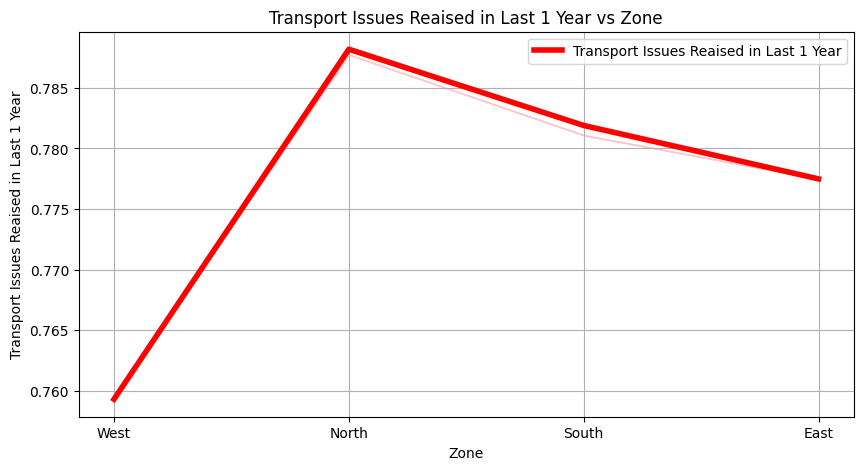

In [55]:
# Transport Issues Reaised in Last 1 Year w.r.t Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['transport_issue_l1y'],label = 'Transport Issues Reaised in Last 1 Year',color='red',linewidth=4,ci = 0.014)
plt.title('Transport Issues Reaised in Last 1 Year vs Zone')
plt.xlabel('Zone')
plt.ylabel('Transport Issues Reaised in Last 1 Year')
plt.grid()
plt.show()

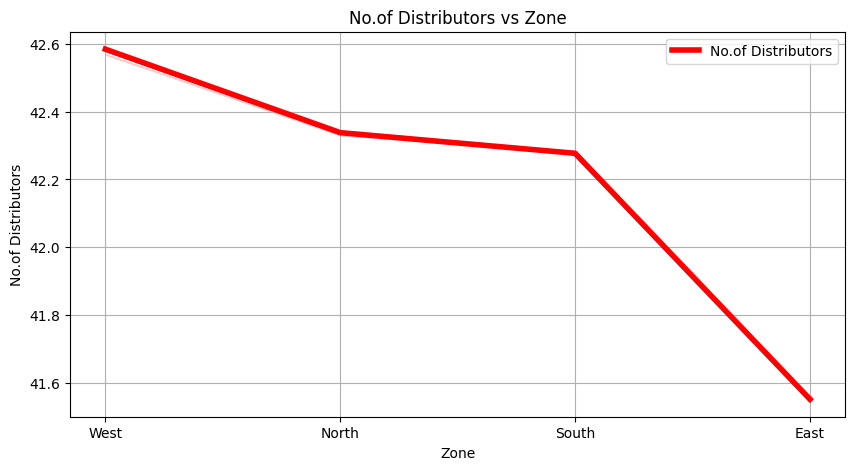

In [56]:
# Distributors w.r.t Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['distributor_num'],label = 'No.of Distributors',color='red',linewidth=4,ci = 0.014)
plt.title('No.of Distributors vs Zone')
plt.xlabel('Zone')
plt.ylabel('No.of Distributors')
plt.grid()
plt.show()

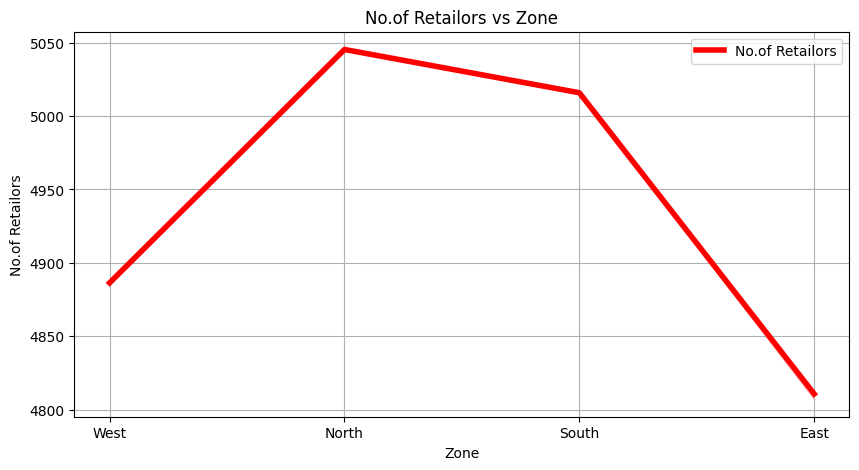

In [57]:
# Retailors w.r.t Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['retail_shop_num'],label = 'No.of Retailors',color='red',linewidth=4,ci = 0.014)
plt.title('No.of Retailors vs Zone')
plt.xlabel('Zone')
plt.ylabel('No.of Retailors')
plt.grid()
plt.show()

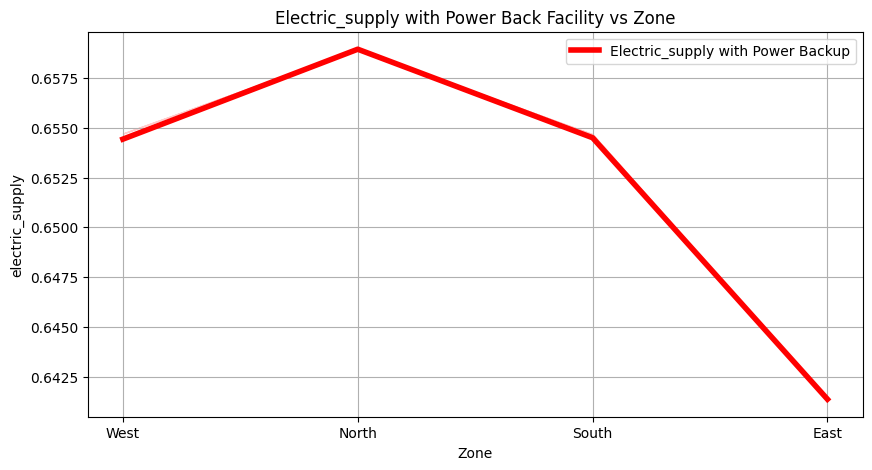

In [58]:
# Retailors w.r.t Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['electric_supply'],label = 'Electric_supply with Power Backup',color='red',linewidth=4,ci = 0.014)
plt.title('Electric_supply with Power Back Facility vs Zone')
plt.xlabel('Zone')
plt.ylabel('electric_supply')
plt.grid()
plt.show()

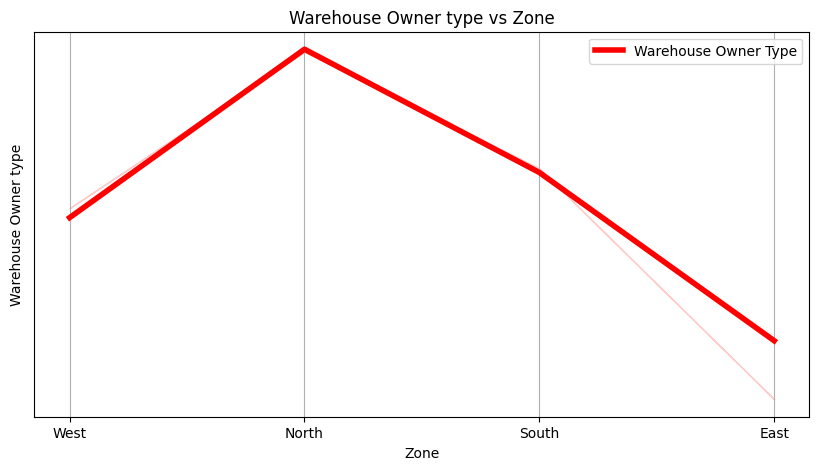

In [59]:
# Warehouse OwnerType w.r.t Zone
plt.figure(figsize=(10,5))
sns.lineplot(x = df['zone'], y = df['wh_owner_type'],label = 'Warehouse Owner Type',color='red',linewidth=4,ci = 0.014)
plt.title('Warehouse Owner type vs Zone')
plt.xlabel('Zone')
plt.ylabel('Warehouse Owner type')
plt.grid()
plt.show()

In [71]:
df[df['zone']=='West']['wh_owner_type'].value_counts()

Company Owned    3858
Rented           3197
Name: wh_owner_type, dtype: int64

In [73]:
df[df['zone']=='North']['wh_owner_type'].value_counts()

Company Owned    4891
Rented           4178
Name: wh_owner_type, dtype: int64

In [74]:
df[df['zone']=='South']['wh_owner_type'].value_counts()

Company Owned    3075
Rented           2569
Name: wh_owner_type, dtype: int64

In [75]:
df[df['zone']=='East']['wh_owner_type'].value_counts()

Company Owned    211
Rented           171
Name: wh_owner_type, dtype: int64